# FINAL PROJECT 2

- NAMA : UMNIYA ZAHRA
- KODE PESERTA : PYTN-KS15-004

dataset : Weather in Australia

sumber : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

# IMPORT LIBRARY

In [2]:
# import library yang digunakan untuk pengolahan data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (5,5)})

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# DATA LOADING

In [3]:
# membaca data
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

Dapat dilihat bahwa pada data terdapat 23 variabel yang terdiri dari sekitar 14000 data

# DATA PROCESSING

In [9]:
# melihat banyaknya data per variabel
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [10]:
# menghapus nilai Nan
df.dropna(axis=0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [11]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# EDA

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [13]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


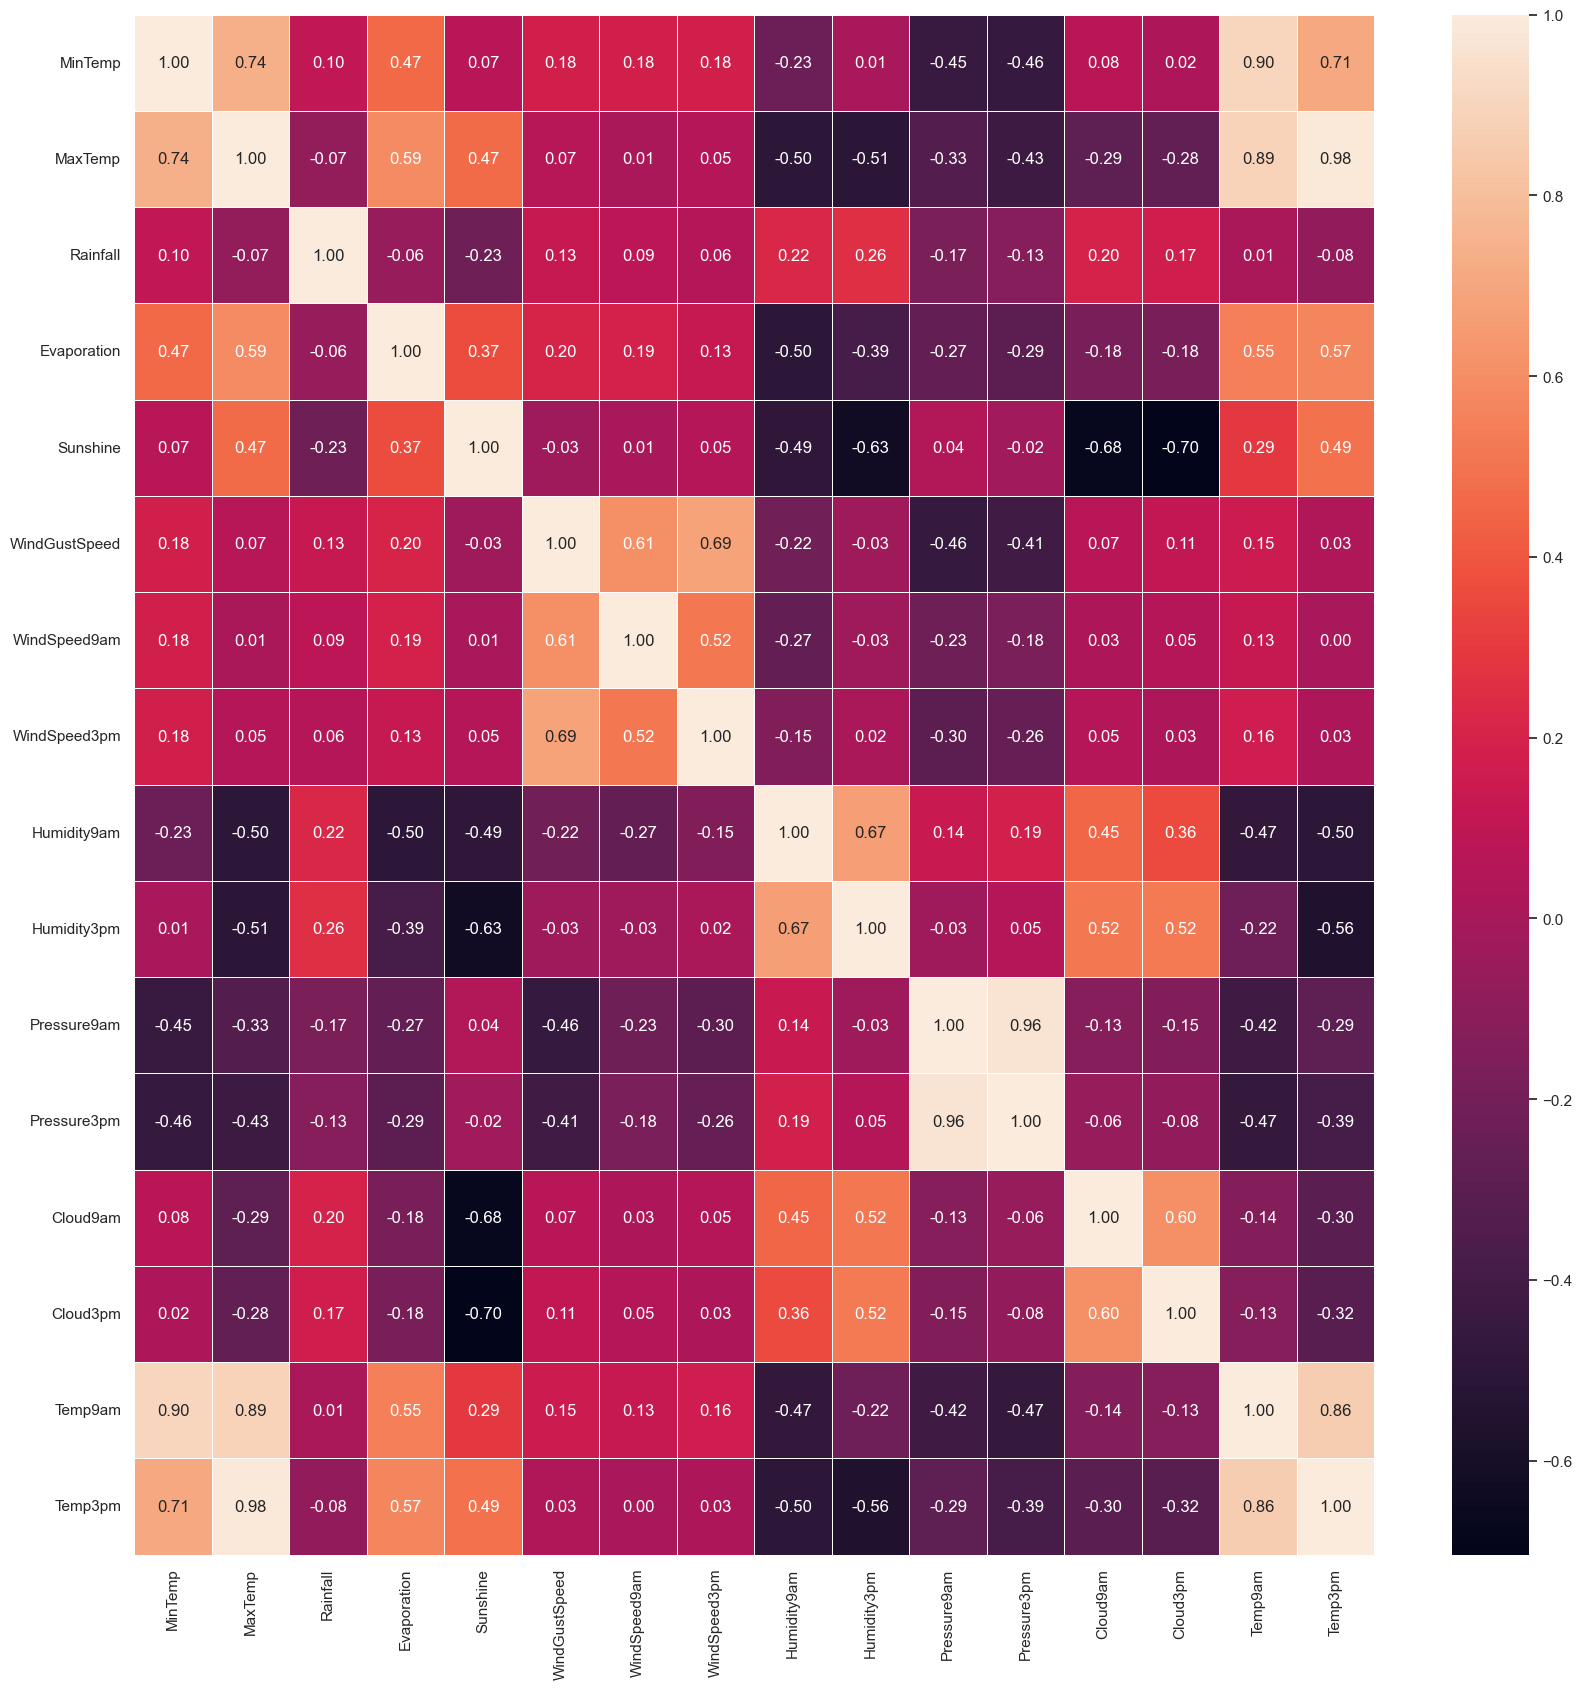

In [14]:
# melakukan visualisasi untuk melihat korelasi dengan heatmap
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f')

In [15]:
# melihat banyaknya data di variabel Rain Tomorrow
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<AxesSubplot:>

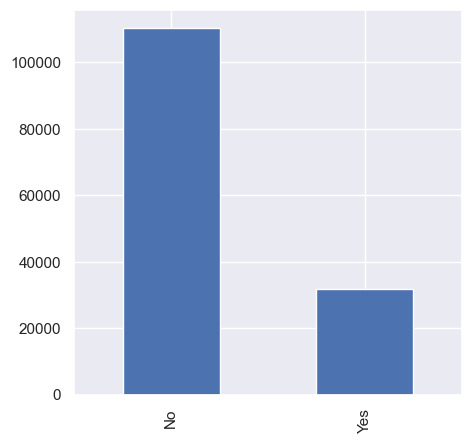

In [16]:
df['RainTomorrow'].value_counts().plot(kind='bar')

In [17]:
df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,11.897675,23.836247,1.270290,5.734807,8.546358,38.288391,13.567314,18.222804,66.217573,46.510625,1018.595599,1016.113587,3.932282,3.921896,17.077001,22.402905
Yes,13.186890,21.119100,6.142104,4.527779,4.471761,45.946764,15.508577,20.078509,77.983314,68.800019,1014.400000,1012.300820,6.099990,6.360065,16.676598,19.197113


In [18]:
df.groupby('RainToday').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,,,
No,11.994339,24.106279,0.075248,5.890936,8.301538,38.855081,13.507234,18.255793,65.232843,47.253270,1018.377635,1015.658345,3.942562,4.089155,17.324634,22.565040
Yes,12.851734,20.194583,10.270354,3.995899,5.313555,43.950805,15.706089,19.958615,81.411731,66.191317,1015.144616,1013.868255,6.019534,5.827370,15.814488,18.644794


In [19]:
df.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall              371.0
Evaporation           145.0
Sunshine               14.5
WindGustSpeed         135.0
WindSpeed9am          130.0
WindSpeed3pm           87.0
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am          1041.0
Pressure3pm          1039.6
Cloud9am                9.0
Cloud3pm                9.0
Temp9am                40.2
Temp3pm                46.7
dtype: object

In [20]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [21]:
df = df.dropna(subset=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed','WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']).reset_index()

In [22]:
df.isnull().sum()

index            0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [23]:
# mendefinisikan X dan y
df = df.copy()
X = df.drop(columns='RainTomorrow', axis=1)
y = df.copy().RainTomorrow
X.head()

,index,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


In [24]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [25]:
# melakukan test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# PREPROCESSING DATA

## 1. OUTLIERS

In [26]:
# mengecek outliers dengan menggunakan IQR dan boxplot
Q1 = np.percentile(X_train['WindGustSpeed'], 25)
Q3 = np.percentile(X_train['WindGustSpeed'], 75)

In [27]:
# menghitung IQR
IQR = Q3 - Q1

print('Quartile 1 =', Q1)
print('Quartile 3 =', Q3)
print('IQR :', IQR)

Quartile 1 = 31.0
Quartile 3 = 48.0
IQR : 17.0


In [28]:
IQR_min = Q1 - (1.5 * IQR)
 
IQR_max = Q3 + (1.5 * IQR)
 
print('IQR minimum : ', IQR_min)
print('IQR maksimum: ', IQR_max)

IQR minimum :  5.5
IQR maksimum:  73.5


In [29]:
# menghitung nilai data minimum dan maximum
data_min = np.min(X_train['WindGustSpeed'])
data_max = np.max(X_train['WindGustSpeed'])
 
print('Nilai minimum : ', data_min)
print('Nilai maksimum : ', data_max)

Nilai minimum :  9.0
Nilai maksimum :  122.0


Text(0.5, 1.0, 'Boxplot WindGustSpeed')

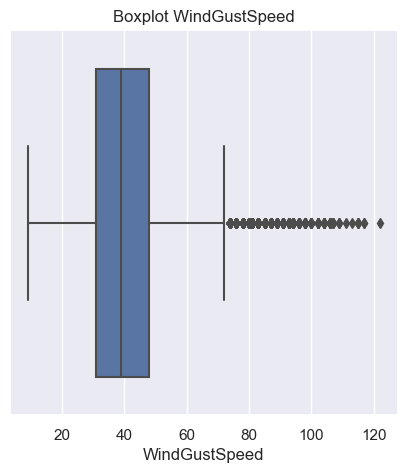

In [30]:
sns.boxplot(X_train['WindGustSpeed'])
plt.title('Boxplot WindGustSpeed')

Dapat dilihat jika nilai minimum yang didapat adalah 6.0 dan maksimum adalah 135.0. Outlier yang didapatkan adalah pada nilai WindGustSpeed diatas 73.5. Saya sendiri memilih untuk tidak menghandling outlier dikarenakan jika di handle maka akan terjadi ketimpangan pada data yang nantinya mempengaruhi pemodelan

## 2.MISSING VALUE

In [31]:
# Handling missing value
X_train.isnull().sum()

index            0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Dapat dilihat jika data sudah tidak terdapat missing value, sehingga tidak perlu diatasi

## 3. FEATURE SELECTION

In [32]:
X_trainfix = X_train.drop(columns=['index','Date', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
X_trainfix.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
29641,18.0,29.2,0.0,8.4,35.0,15.0,17.0,40.0,26.0,1014.2,1011.9,25.3,27.8,No
45770,13.8,22.6,3.8,6.8,37.0,11.0,20.0,95.0,49.0,1018.9,1018.4,16.9,21.2,Yes
30633,15.9,25.6,0.6,10.6,31.0,13.0,15.0,58.0,53.0,1018.5,1016.9,22.9,23.8,No
40009,10.4,27.7,0.0,11.1,50.0,22.0,24.0,46.0,29.0,1022.7,1019.3,19.9,25.2,No
28650,3.1,14.1,0.0,6.5,19.0,6.0,7.0,93.0,54.0,1027.4,1024.5,6.0,13.0,No


- Penghapusan kolom date, sunshine, evaporation, cloud3pm dikarenakan data yang dimilki >40% adalah data null
- Penghapusan kolom Location karena lokasinya sangat banyak untuk dikategorikkan dan akan mempengaruhi model
- Penghapusan kolom WindGustDir, WindDir9am , Winddir3pm dikarenakan tidak akan dimasukkan ke dalam model karena berisi arah mata angin

## 4. Scalling Data

In [33]:
# scalling data untuk data bersifat numeric
scaler = StandardScaler()
X_trainfix_scalling = scaler.fit_transform(X_trainfix[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']])
X_test_scalling = scaler.transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm']])

## 5. ENCODING

In [34]:
# mengkategorikan data menjadi categorical
categorical = [var for var in X_trainfix.columns if X_trainfix[var].dtype=='object']
print("Number of categorical variables: ", len(categorical))
print(categorical)

Number of categorical variables:  1
['RainToday']


In [35]:
# mengkategorikan data menjadi categorical
categorical = [var for var in y_train]
print("Number of categorical variables: ", len(categorical))


Number of categorical variables:  42315


In [36]:
# mengganti nilai variabel menjadi numeric
X_trainfix['RainToday'].replace({'No':0, 'Yes':1},inplace = True )
y_train.replace({'No':0, 'Yes':1},inplace = True)
y_test.replace({'No':0, 'Yes':1},inplace = True)

In [37]:
X_trainfix

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
29641,18.0,29.2,0.0,8.4,35.0,15.0,17.0,40.0,26.0,1014.2,1011.9,25.3,27.8,0
45770,13.8,22.6,3.8,6.8,37.0,11.0,20.0,95.0,49.0,1018.9,1018.4,16.9,21.2,1
30633,15.9,25.6,0.6,10.6,31.0,13.0,15.0,58.0,53.0,1018.5,1016.9,22.9,23.8,0
40009,10.4,27.7,0.0,11.1,50.0,22.0,24.0,46.0,29.0,1022.7,1019.3,19.9,25.2,0
28650,3.1,14.1,0.0,6.5,19.0,6.0,7.0,93.0,54.0,1027.4,1024.5,6.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,8.3,19.3,9.6,8.3,28.0,6.0,13.0,81.0,48.0,1022.1,1021.8,14.5,18.9,1
54343,17.6,30.7,0.0,11.2,37.0,28.0,13.0,46.0,30.0,1015.6,1011.8,22.1,29.7,0
38158,10.3,18.2,0.2,2.0,24.0,6.0,7.0,78.0,57.0,1024.4,1022.9,14.0,17.6,0
860,18.9,28.2,0.0,7.1,37.0,19.0,17.0,77.0,73.0,1017.0,1016.1,25.3,26.9,0


In [38]:
y_train.head()

29641    0
45770    0
30633    0
40009    0
28650    0
Name: RainTomorrow, dtype: int64

In [39]:
# membuat dummy variabel
categorical_columns = ['RainToday', 'RainTomorrow']
datafix_dummies= pd.get_dummies(df, columns = categorical_columns)

# MODELING

## LOGISTIC REGRESSION

In [40]:
# memanggil model
log_model = LogisticRegression(max_iter=1000)

In [41]:
# fit model
log_model.fit(X_trainfix_scalling, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# membuat prediksi dari model
y_predictlog= log_model.predict(X_test_scalling)

In [43]:
# membuat confusion matrix
confusionmatrixlog = confusion_matrix(y_test, y_predictlog)
confusionmatrixlog

array([[10457,   522],
       [ 1595,  1531]], dtype=int64)

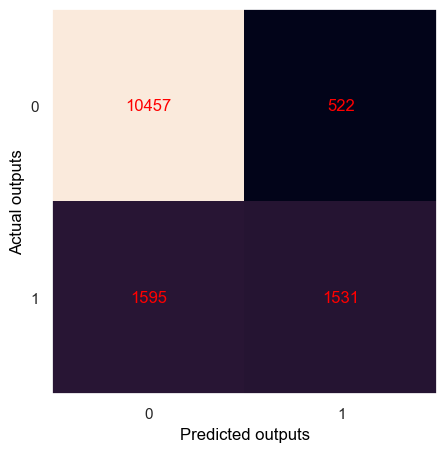

In [44]:
cm = confusion_matrix(y_test, y_predictlog)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

Dapat dilihat dengan confussion matrix jika nilai True Positif dengan nilai 10457 dan True Negative dengan nilai 1531. Yang berarti nilai prediksi untuk besok hujan dan model membuat prediksi bahwa besok hujan lebih banyak daripada besok tidak hujan dan model membuat prediksi bahwa besok tidak hujan. 

In [45]:
# classification report
print(classification_report(y_test,y_predictlog))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10979
           1       0.75      0.49      0.59      3126

    accuracy                           0.85     14105
   macro avg       0.81      0.72      0.75     14105
weighted avg       0.84      0.85      0.84     14105



- Dilihat dari classification report berdasarkan nilai precission dapat menjawab jika ada pertanyaan berapa persen kemungkinan hujan/tidak dari keseluruhan data yang diambil, Ya bernilai 75% dan tidak bernilai 87%
- Dilihat dari classification report berdasarkan nilai recall dapat menjawab jika ada pertanyaan berapa persen kemungkinan hujan/tidak dari keseluruhan data yang diambil, Ya bernilai 49% dan tidak bernilai 95%

In [46]:
print("accuracy:", accuracy_score(y_test, y_predictlog) )

accuracy: 0.849911378943637


Dari nilai accuracy, hasil yang didapat adalah 0,8499 yang berarti sekitar 84.99% model yang digunakan akurat untuk mengklasifikasi

 ## SVM

In [47]:
# memanggil model SVM
svm_model = SVC()

In [48]:
# fit model
svm_model.fit(X_trainfix_scalling, y_train)

SVC()

In [49]:
# membuat prediksi dari model
y_predictsvm= svm_model.predict(X_test_scalling)

In [50]:
# membuat confusion matrix
confusionmatrix_svm = confusion_matrix(y_test,y_predictsvm)
confusionmatrix_svm

array([[10583,   396],
       [ 1707,  1419]], dtype=int64)

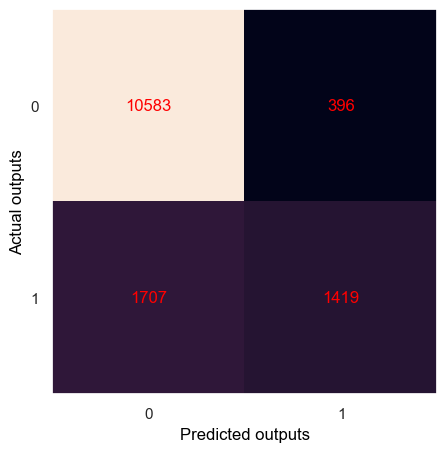

In [51]:
cm = confusion_matrix(y_test, y_predictsvm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

Dapat dilihat dengan confussion matrix jika nilai True Positif dengan nilai 10583 dan True Negative dengan nilai 1419. Yang berarti nilai prediksi untuk besok hujan dan model membuat prediksi bahwa besok hujan lebih banyak daripada besok tidak hujan dan model membuat prediksi bahwa besok tidak hujan. 

In [52]:
# classification report
print(classification_report(y_test,y_predictsvm))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10979
           1       0.78      0.45      0.57      3126

    accuracy                           0.85     14105
   macro avg       0.82      0.71      0.74     14105
weighted avg       0.84      0.85      0.84     14105



- Dilihat dari classification report berdasarkan nilai precission dapat menjawab jika ada pertanyaan berapa persen kemungkinan hujan/tidak dari keseluruhan data yang diambil, Ya bernilai 78% dan tidak bernilai 86%
- Dilihat dari classification report berdasarkan nilai recall dapat menjawab jika ada pertanyaan berapa persen kemungkinan hujan/tidak dari keseluruhan data yang diambil, Ya bernilai 45% dan tidak bernilai 96%

In [53]:
print("accuracy:", accuracy_score(y_test, y_predictsvm) )

accuracy: 0.8509039347749026


Dari nilai accuracy, hasil yang didapat adalah 0,851 yang berarti sekitar 85% model yang digunakan akurat untuk mengklasifikasi

## PEMODELAN BARU

In [54]:
Xbaru = np.arange(10).reshape(-1,1)
ybaru = np.array([0,0,0,0,0,1,1,1,1,1])
print(Xbaru)
print(ybaru)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 0 1 1 1 1 1]


In [55]:
# Split test
Xbaru_train, Xbaru_test, ybaru_train, ybaru_test = train_test_split(Xbaru, ybaru, test_size=0.0001, random_state=42)

In [56]:
# scalling data
scaler = StandardScaler()
Xbaru_train_scal = scaler.fit_transform(Xbaru_train)
Xbaru_test_scal = scaler.transform(Xbaru_test)

In [57]:
# fit model
log_modelbaru = LogisticRegression(max_iter=1000)
log_modelbaru.fit(Xbaru_train_scal, ybaru_train)
y_predictlogbaru= log_modelbaru.predict(Xbaru_test_scal)

In [58]:
# confusion matrix
confusionmatrixlog = confusion_matrix(ybaru_test, y_predictlogbaru)
confusionmatrixlog

array([[1]], dtype=int64)

# KESIMPULAN

- Terdapat data jika besok tidak hujan sebanyak 110316, dan besok hujan sebanyak 31877 data
- Beberapa variabel dari dataset tidak dimasukkan ke dalam pemodelan karena ketimpangan data dan korelasi yang rendah terhadap y
- Model yang digunakan untuk memprediksi memiliki hasil yang sama yaitu hari esok tidak akan hujan dilihat dari nilai confussion matrix dan classification report yang sudah dijabarkan diatas, dengan tingkat akurasi regresi logistik 84.99% dan SVM 85%
- Di Australia besok tidak akan terjadi hujan